# Importing Packages

I used pandas for tables, matplotlib for graphing and scikit-learn for machine learning.

In [252]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split
from matplotlib.ticker import PercentFormatter


# Table Setup

I imported the csv table into a pandas-acceptable format, then converted our Quality values into a binary classifier. Industry standards for oranges are rather high, so anything 4+ is considered good (which is represented by 1) and anything below was considered bad (which is represented by a 0). Due to the small size of the dataset, I decided not to utilize the orange type / variety as a factor due to the high variability and little correlation they have. Color was also dropped as well. Then, I split the values into a good orange table and a bad orange table. This allowed me to compare the differing values and how they're correlated with good and bad orange classification.

In [255]:
data = pd.read_csv("orange Quality Data.csv")

# this is how we import our table from csv file to being able to be read by pandas

In [256]:
data

# here's how the table looks like

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Color,Variety,Blemishes (Y/N),Quality (1-5)
0,7.5,180,12.0,3.2,2.0,10,4.0,Orange,Valencia,N,4.0
1,8.2,220,10.5,3.4,3.0,14,4.5,Deep Orange,Navel,N,4.5
2,6.8,150,14.0,3.0,1.0,7,5.0,Light Orange,Cara Cara,N,5.0
3,9.0,250,8.5,3.8,4.0,21,3.5,Orange-Red,Blood Orange,N,3.5
4,8.5,210,11.5,3.3,2.5,12,5.0,Orange,Hamlin,Y (Minor),4.5
...,...,...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,Orange-Red,Tangerine,Y (Scars),5.0
237,7.4,275,8.5,3.5,5.0,20,5.0,Light Orange,Minneola (Hybrid),N,4.0
238,7.5,196,15.7,3.0,3.0,13,3.0,Deep Orange,Temple,Y (Minor Insect Damage),5.0
239,7.2,251,9.8,4.3,3.0,23,1.0,Light Orange,Moro (Blood),Y (Minor Insect Damage),3.0


In [257]:
data_quality = data.drop(columns=["Color", "Variety", "Blemishes (Y/N)"])
# we have eliminated all non-numerical values and changed all values to integers

In [258]:
data_quality['Quality v1'] = data_quality['Quality (1-5)'].astype("int")
data_quality['Quality Binary'] = data_quality['Quality v1'].replace([1,2,3,4,5],[0,0,0,1,1])
data_quality = data_quality.drop(columns = 'Quality v1')
# 4 and 5 will be considered good quality; 1, 2 and 3 will be considered bad quality

In [259]:
data_quality

,Size (cm),Weight (g),Brix (Sweetness),pH (Acidity),Softness (1-5),HarvestTime (days),Ripeness (1-5),Quality (1-5),Quality Binary
0,7.5,180,12.0,3.2,2.0,10,4.0,4.0,1
1,8.2,220,10.5,3.4,3.0,14,4.5,4.5,1
2,6.8,150,14.0,3.0,1.0,7,5.0,5.0,1
3,9.0,250,8.5,3.8,4.0,21,3.5,3.5,0
4,8.5,210,11.5,3.3,2.5,12,5.0,4.5,1
...,...,...,...,...,...,...,...,...,...
236,8.0,194,10.9,3.6,5.0,13,1.0,5.0,1
237,7.4,275,8.5,3.5,5.0,20,5.0,4.0,1
238,7.5,196,15.7,3.0,3.0,13,3.0,5.0,1
239,7.2,251,9.8,4.3,3.0,23,1.0,3.0,0


In [260]:
orange_good = data_quality[data_quality["Quality Binary"]==1]
orange_bad = data_quality[data_quality["Quality Binary"]==0]

#split tables into good and bad oranges for graphing comparisons

# Data Visualization

Using matplotlib, I analyzed the correlation of different variables with the quality of oranges. 

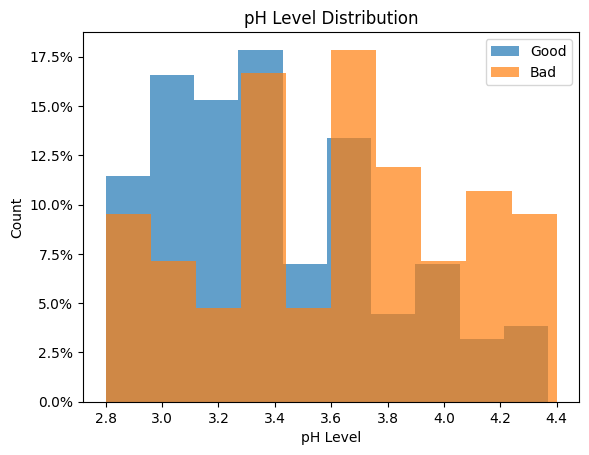

In [267]:
plt.hist(orange_good["pH (Acidity)"], weights=np.ones(len(orange_good["pH (Acidity)"]))/len(orange_good['pH (Acidity)']), label="Good", alpha = 0.7)
plt.hist(orange_bad["pH (Acidity)"], weights=np.ones(len(orange_bad["pH (Acidity)"]))/len(orange_bad['pH (Acidity)']), label = "Bad", alpha = 0.7)
plt.xlabel("pH Level")
plt.ylabel("Count")
plt.title("pH Level Distribution")
plt.legend()
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

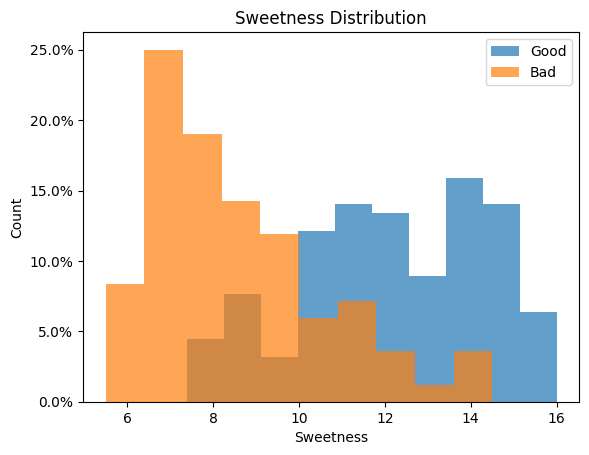

In [268]:
plt.hist(orange_good["Brix (Sweetness)"], weights=np.ones(len(orange_good["Brix (Sweetness)"]))/len(orange_good["Brix (Sweetness)"]), label="Good", alpha = 0.7)
plt.hist(orange_bad["Brix (Sweetness)"], weights=np.ones(len(orange_bad["Brix (Sweetness)"]))/len(orange_bad["Brix (Sweetness)"]), label = "Bad", alpha = 0.7)
plt.xlabel("Sweetness")
plt.ylabel("Count")
plt.title("Sweetness Distribution")
plt.legend()
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

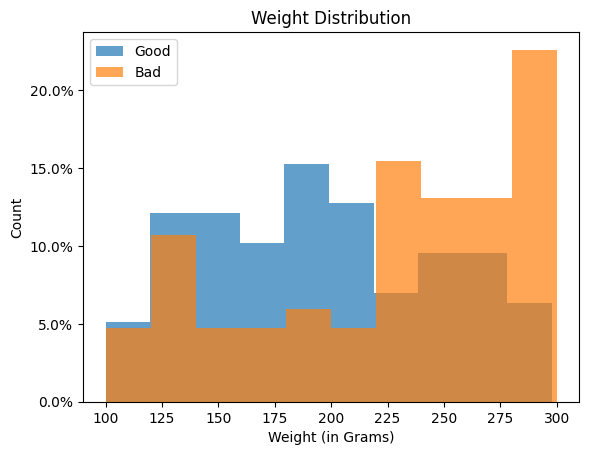

In [269]:
plt.hist(orange_good["Weight (g)"], weights=np.ones(len(orange_good["Weight (g)"]))/len(orange_good["Weight (g)"]), label="Good", alpha = 0.7)
plt.hist(orange_bad["Weight (g)"], weights=np.ones(len(orange_bad["Weight (g)"]))/len(orange_bad["Weight (g)"]), label = "Bad", alpha = 0.7)
plt.xlabel("Weight (in Grams)")
plt.ylabel("Count")
plt.title("Weight Distribution")
plt.legend()
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

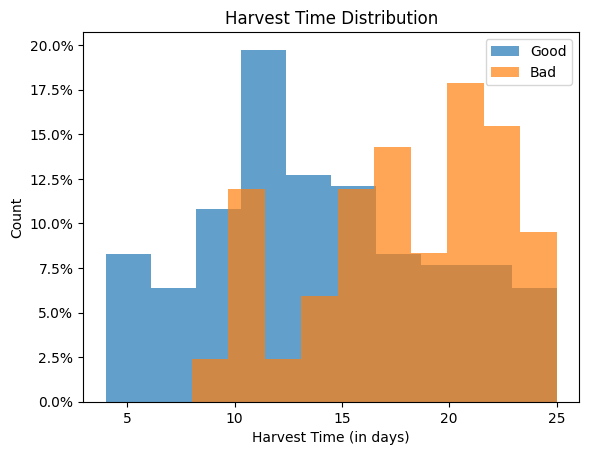

In [270]:
plt.hist(orange_good["HarvestTime (days)"], weights=np.ones(len(orange_good["HarvestTime (days)"]))/len(orange_good["HarvestTime (days)"]), label="Good", alpha = 0.7)
plt.hist(orange_bad["HarvestTime (days)"], weights=np.ones(len(orange_bad["HarvestTime (days)"]))/len(orange_bad["HarvestTime (days)"]), label = "Bad", alpha = 0.7)
plt.xlabel("Harvest Time (in days)")
plt.ylabel("Count")
plt.title("Harvest Time Distribution")
plt.legend()
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

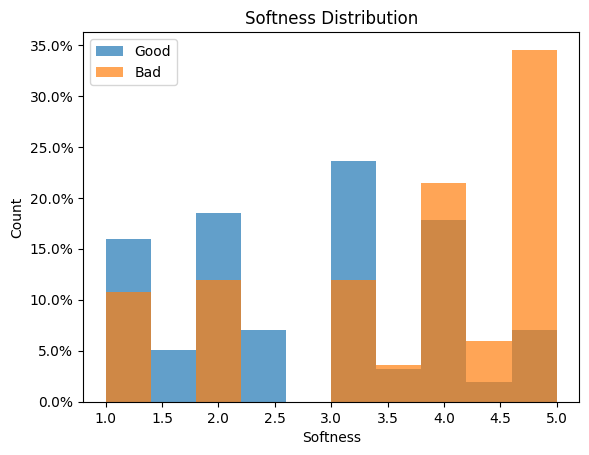

In [271]:
plt.hist(orange_good["Softness (1-5)"], weights=np.ones(len(orange_good["Softness (1-5)"]))/len(orange_good["Softness (1-5)"]), label="Good", alpha = 0.7)
plt.hist(orange_bad["Softness (1-5)"], weights=np.ones(len(orange_bad["Softness (1-5)"]))/len(orange_bad["Softness (1-5)"]), label = "Bad", alpha = 0.7)
plt.xlabel("Softness")
plt.ylabel("Count")
plt.title("Softness Distribution")
plt.legend()
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

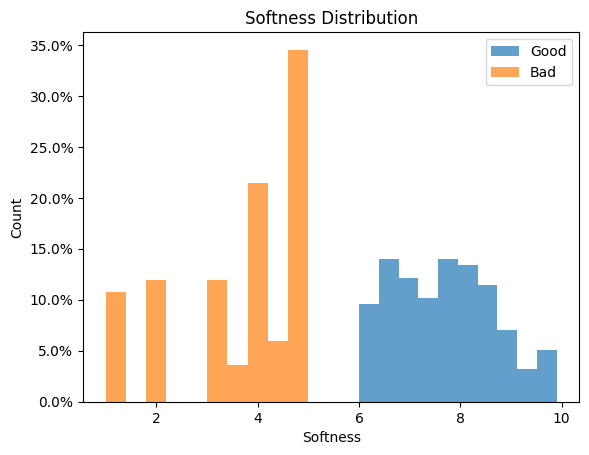

In [272]:
plt.hist(orange_good["Size (cm)"], weights=np.ones(len(orange_good["Softness (1-5)"]))/len(orange_good["Softness (1-5)"]), label="Good", alpha = 0.7)
plt.hist(orange_bad["Softness (1-5)"], weights=np.ones(len(orange_bad["Softness (1-5)"]))/len(orange_bad["Softness (1-5)"]), label = "Bad", alpha = 0.7)
plt.xlabel("Softness")
plt.ylabel("Count")
plt.title("Softness Distribution")
plt.legend()
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

# Machine Learning Model

I utilized scikit-learn's logistic regression model to predict orange quality. Logistic regression models work best with classifying categorical variables (such as quality, which was encoded as binary variables). Size, Weight, Brix (Sweetness), pH Level, Harvest Time, Sweetness and Softness were all used as variables to help predict whether or not an orange had good quality.

In [274]:
predictors = data_quality.drop(columns = ['Quality (1-5)', 'Quality Binary'])
results = data_quality['Quality Binary']

In [275]:
X_train, X_test, Y_train, Y_test = train_test_split(predictors, results, test_size =0.1, random_state = 42)

In [276]:
model = lm.LogisticRegression()
model.fit(X_train, Y_train)

/opt/homebrew/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [277]:
model.score(X_test, Y_test)

0.88

# Conclusion
Using a threshold of 4+ in quality ratings to classify an orange as "good" quality, I converted all quality values accordingly to create a binary classifier.